# Using Decision Tree

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import datetime

In [52]:
Data = pd.read_csv("myfile.csv")
Data = Data.drop('Unnamed: 0', axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19503 entries, 0 to 19502
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  19503 non-null  object 
 1   PM2.5     18061 non-null  float64
 2   PM10      18071 non-null  float64
 3   CO        19480 non-null  float64
 4   AQI       18066 non-null  float64
dtypes: float64(4), object(1)
memory usage: 762.0+ KB


In [53]:
#Replace Blank String values with 0
Data['AQI'] = Data['AQI'].fillna(0)
Data['PM2.5'] = Data['PM2.5'].fillna(0)
Data['PM10'] = Data['PM10'].fillna(0)
Data['CO'] = Data['CO'].fillna(0)
Data.head(50)

,Datetime,PM2.5,PM10,CO,AQI
0,2018-04-10 10:00:00,34.82,54.45,1.13,0.0
1,2018-04-10 11:00:00,31.82,57.80,1.02,0.0
2,2018-04-10 12:00:00,29.61,51.04,0.94,0.0
3,2018-04-10 13:00:00,33.37,51.61,0.91,0.0
4,2018-04-10 14:00:00,36.71,58.00,0.91,0.0
5,2018-04-10 15:00:00,35.88,56.18,0.86,0.0
6,2018-04-10 16:00:00,37.16,53.08,0.97,0.0
7,2018-04-10 17:00:00,37.37,53.86,0.89,0.0
8,2018-04-10 18:00:00,35.42,53.62,0.79,0.0
9,2018-04-10 19:00:00,36.37,57.87,0.99,0.0


In [54]:
X = Data.iloc[:,1:-1].values
Y = Data.iloc[:, -1].values.reshape(-1,1)
print(X)

[[34.82 54.45  1.13]
 [31.82 57.8   1.02]
 [29.61 51.04  0.94]
 ...
 [13.64 36.66  0.33]
 [12.02 33.93  0.34]
 [10.53 31.58  0.3 ]]


In [55]:
#Spliting Training & Testing Data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X, Y, test_size=0.1, random_state=119)

In [56]:
#Checking if there is any null values
Data.isnull().sum()

Datetime    0
PM2.5       0
PM10        0
CO          0
AQI         0
dtype: int64

In [57]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [59]:
pred_y = regressor.predict(test_x)

In [60]:
from sklearn.metrics import mean_squared_error

print("Accuracy is : ", regressor.score(test_x, test_y))
print("Mean Squared Error is: ", mean_squared_error(test_y,pred_y))
df= pd.DataFrame({'Real Values':test_y.reshape(-1), 'Predicted Values':pred_y.reshape(-1)})
df

Accuracy is :  0.756611791851889
Mean Squared Error is:  2761.476850664494


,Real Values,Predicted Values
0,394.0,376.0
1,187.0,164.0
2,74.0,189.0
3,101.0,70.0
4,0.0,0.0
...,...,...
1946,72.0,46.0
1947,52.0,45.0
1948,51.0,47.0
1949,52.0,58.0


In [74]:
import graphviz

from sklearn import tree 
# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, 
                                feature_names=X.feature_names,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [70]:
from sklearn import tree
text_rep = tree.export_text(regressor)
print(text_rep)

|--- feature_1 <= 122.03
|   |--- feature_1 <= 64.83
|   |   |--- feature_1 <= 0.38
|   |   |   |--- feature_2 <= 0.19
|   |   |   |   |--- value: [0.54]
|   |   |   |--- feature_2 >  0.19
|   |   |   |   |--- feature_2 <= 0.78
|   |   |   |   |   |--- feature_2 <= 0.76
|   |   |   |   |   |   |--- feature_2 <= 0.67
|   |   |   |   |   |   |   |--- feature_2 <= 0.44
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.39
|   |   |   |   |   |   |   |   |   |--- value: [45.00]
|   |   |   |   |   |   |   |   |--- feature_2 >  0.39
|   |   |   |   |   |   |   |   |   |--- value: [51.00]
|   |   |   |   |   |   |   |--- feature_2 >  0.44
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.58
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.51
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.48
|   |   |   |   |   |   |   |   |   |   |   |--- value: [69.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.48
|   |   |   |   |   |   |   |   |   |   |   |--- value

In [72]:
export_graphviz?

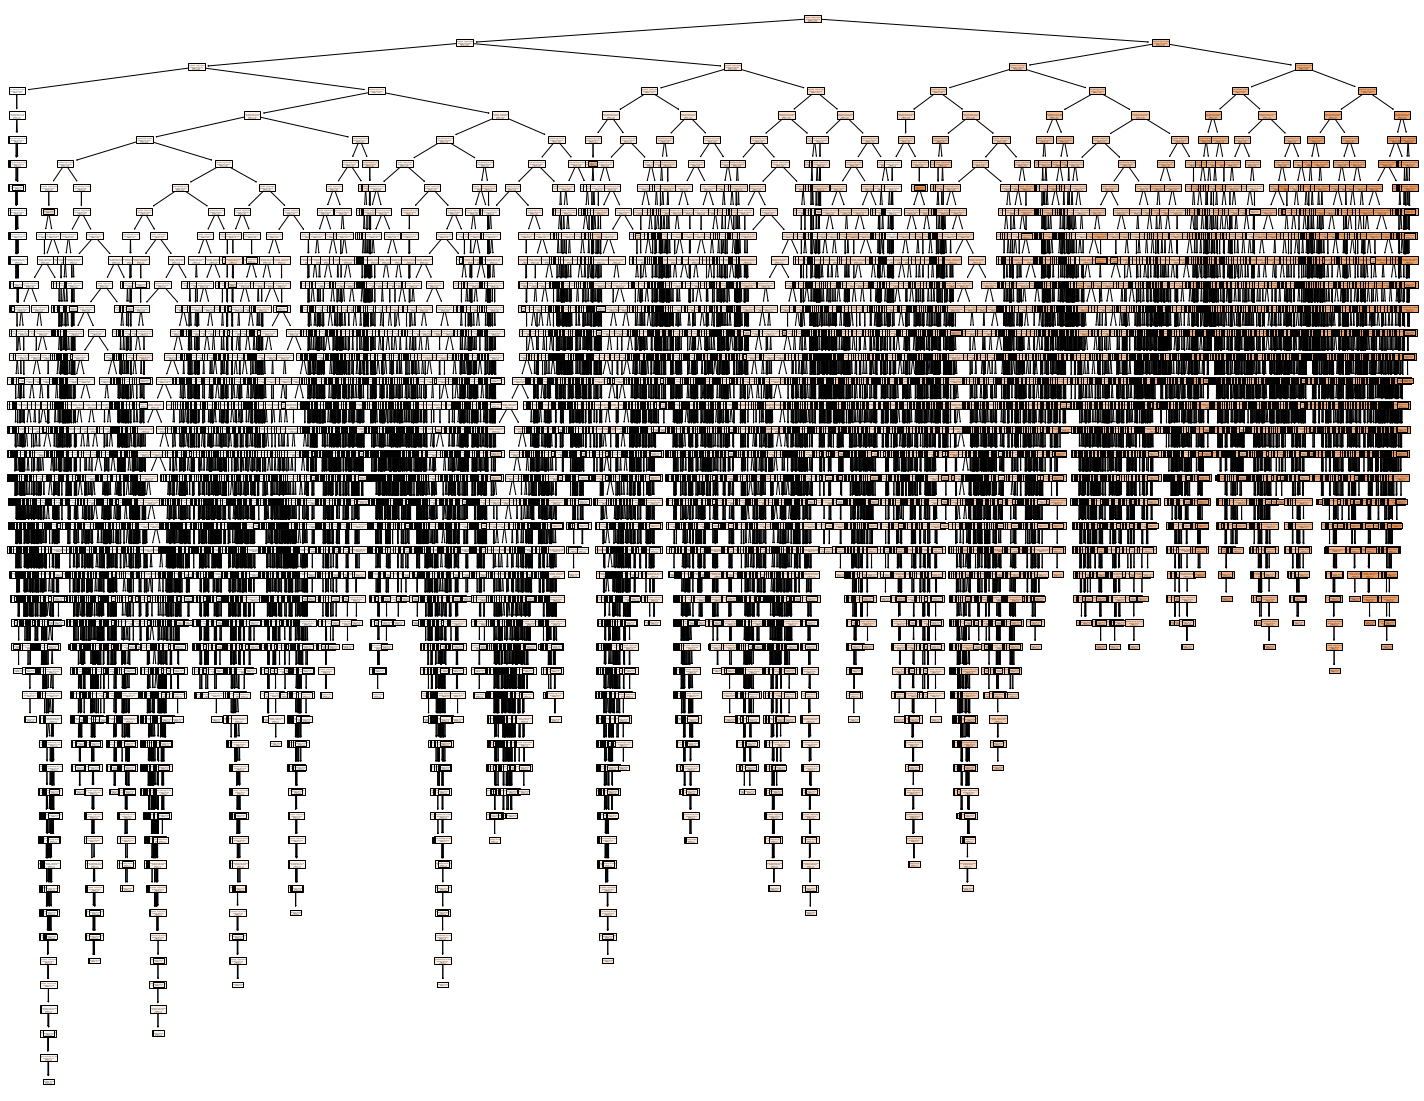

In [78]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=X[:], filled=True)

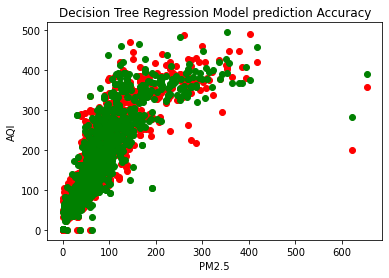

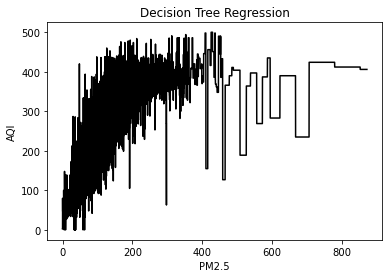

In [48]:

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(test_x, test_y, color = 'red')
plt.scatter(test_x, pred_y, color = 'Green')
plt.title('Decision Tree Regression Model prediction Accuracy')
plt.xlabel('PM2.5') 
plt.ylabel('AQI')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color='black')
plt.title('Decision Tree Regression')
plt.xlabel('PM2.5') 
plt.ylabel('AQI')
plt.show()

In [ ]:

.
